In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
students = pd.read_csv("./clean/students.csv")
sessions = pd.read_csv("./clean/sessions.csv")

merged_df = sessions.merge(students, how="inner", on="ID")

## General Overview

How many sessions have I held and with how many students in each bootcamp?

In [3]:
total_sessions_all = sessions.ID.count()
total_sessions_data = merged_df.loc[merged_df.BOOTCAMP == 'DATA', 'ID'].count()
total_sessions_web = merged_df.loc[merged_df.BOOTCAMP == 'FULL_STACK', 'ID'].count()

total_students_all = students.ID.count()
total_students_data = students.loc[students.BOOTCAMP == 'DATA', 'ID'].count()
total_students_web = students.loc[students.BOOTCAMP == 'FULL_STACK', 'ID'].count()

print(
    "QUICK OVERVIEW\n"
    "--------[SESSIONS]-------------\n",
    f"\tTOTAL TUTORING SESSIONS: {total_sessions_all:,}\n",
    f"\tTOTAL DATA TUTORING SESSIONS: {total_sessions_data:,}\n",
    f"\tTOTAL FULL STACK TUTORING SESSIONS: {total_sessions_web}\n",
    "--------[STUDENTS]-------------\n",
    f"\tTOTAL STUDENTS (ALL): {total_students_all}\n",
    f"\tTOTAL STUDENTS (DATA): {total_students_data}\n",
    f"\tTOTAL STUDENTS (WEB): {total_students_web}\n"
)    

QUICK OVERVIEW
--------[SESSIONS]-------------
 	TOTAL TUTORING SESSIONS: 1,418
 	TOTAL DATA TUTORING SESSIONS: 1,091
 	TOTAL FULL STACK TUTORING SESSIONS: 320
 --------[STUDENTS]-------------
 	TOTAL STUDENTS (ALL): 258
 	TOTAL STUDENTS (DATA): 179
 	TOTAL STUDENTS (WEB): 79



DATA STUDENTS: 179/258
WEB STUDENTS: 79/258


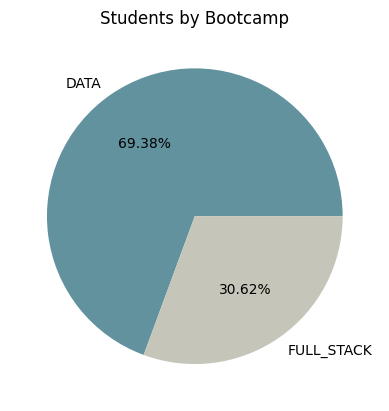

In [4]:
print(f"DATA STUDENTS: {total_students_data}/{total_students_all}")
print(f"WEB STUDENTS: {total_students_web}/{total_students_all}")
students.BOOTCAMP.value_counts().plot.pie(autopct="%1.2f%%", colors=["#62929e", "#c6c5b9"])
plt.title("Students by Bootcamp")
plt.ylabel("")
plt.show()

Looks like I have more Data students than Full Stack students. Does this inherently mean that there are more tutoring sessions for data students than full stack ones?

DATA SESSIONS: 1,091/1,418
WEB SESSIONS: 320/1,418


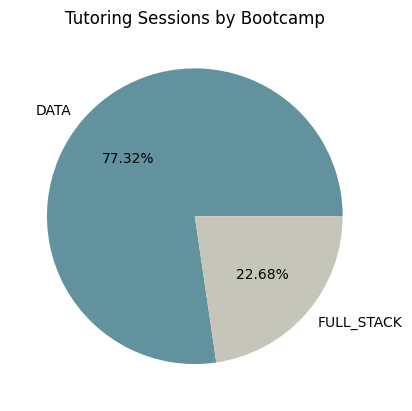

In [5]:
sessions_by_bootcamp = merged_df.BOOTCAMP.value_counts()
print(f"DATA SESSIONS: {total_sessions_data:,}/{total_sessions_all:,}")
print(f"WEB SESSIONS: {total_sessions_web}/{total_sessions_all:,}")
sessions_by_bootcamp.plot.pie(autopct="%1.2f%%", colors=["#62929e", "#c6c5b9"])
plt.title("Tutoring Sessions by Bootcamp")
plt.ylabel("")
plt.show()

There's more data sessions than full stack sessions, but that might just because I have more data students.

Let's look at the students individually and see how many sessions they book.

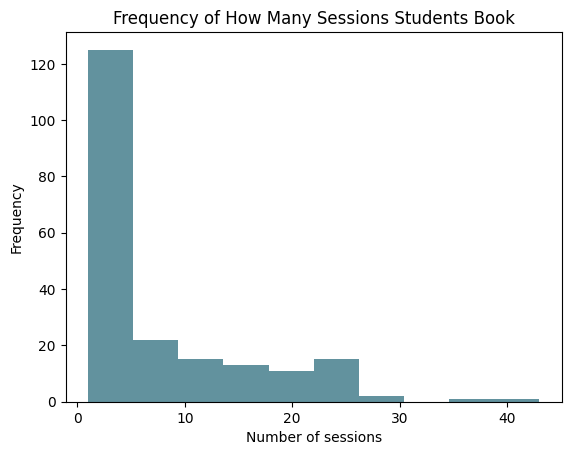

In [6]:
num_student_sessions = merged_df.groupby(["ID"])[["DATE"]].count()
num_student_sessions.plot.hist(color="#62929e", legend=None)
plt.title("Frequency of How Many Sessions Students Book")
plt.xlabel("Number of sessions")
plt.show()

We want to get an average for the students per bootcamp.

Since the distribution of student sessions is skewed right, we'll want to use median as our summary statistic.

We should also check the mode to see how many times most students from each bootcamp book.

In [7]:
bootcamp_with_student_sums = num_student_sessions.merge(students, how="inner", on="ID")[["ID", "DATE", "BOOTCAMP"]]
bootcamp_with_student_sums.columns = ["ID", "NUM_SESSIONS", "BOOTCAMP"]
bootcamp_with_student_sums.groupby(["BOOTCAMP"]).agg({"NUM_SESSIONS":["min", "median", "max", pd.Series.mode]})

NUM_SESSIONS                
                    min median max mode
BOOTCAMP                               
DATA                  1    4.0  36    1
FULL_STACK            1    1.0  43    1

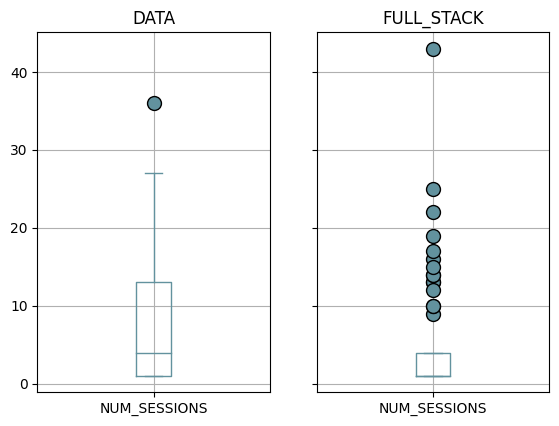

In [8]:
bootcamp_with_student_sums.groupby(["BOOTCAMP"]).boxplot(column="NUM_SESSIONS", 
                                                         color="#62929e", 
                                                         flierprops=dict(markerfacecolor='#62929e',markersize=10))
plt.show()

It looks like for Full-Stack, I have fewer students and they schedule fewer sessions. Data Analytics has more students who schedule more sessions--which makes sense as I tutored a lot of the students I TA'd for the first few years when I was TA-ing.

Regardless of the bootcamp, most students schedule 1 session with me--which makes sense because the new system randomly assigns students and tutors.

## Length of Sessions

How long is the average tutoring session? Per bootcamp? Per Student?

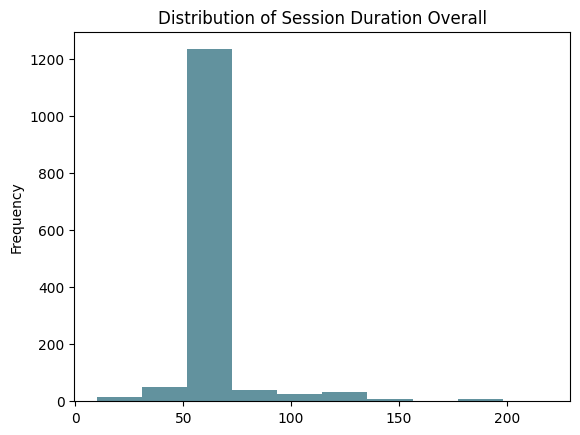

In [9]:
merged_df.DURATION.plot.hist(color="#62929e")
plt.title("Distribution of Session Duration Overall")
plt.show()

Since this distribution has a right skew, we'll use median again for the average. 

In [10]:
overall_avg_duration = merged_df.agg({"DURATION":["median", "min", "max"]})
data_avg_duration = merged_df.loc[merged_df.BOOTCAMP == 'DATA'].agg({"DURATION":["median", "min", "max"]})
web_avg_duration = merged_df.loc[merged_df.BOOTCAMP == 'FULL_STACK'].agg({"DURATION":["median", "min", "max"]})

print(
    "QUICK SUMMARY OF TUTORING SESSION LENGTH\n",
    "--------[OVERALL]------------\n",
    f"\tMedian length of session overall: {overall_avg_duration.values[0][0]} minutes\n",
    f"\tOverall min session length: {overall_avg_duration.values[1][0]} minutes\n",
    f"\tOverall max session length: {overall_avg_duration.values[2][0]} minutes\n",
    "--------[DATA]------------\n",
    f"\tMedian length of data session: {data_avg_duration.values[0][0]} minutes\n",
    f"\tData min session length: {data_avg_duration.values[1][0]} minutes\n",
    f"\tData max session length: {data_avg_duration.values[2][0]} minutes\n",
    "--------[FULL STACK]------------\n",
    f"\tMedian length of full stack session: {web_avg_duration.values[0][0]} minutes\n",
    f"\tFull Stack min session length: {web_avg_duration.values[1][0]} minutes\n",
    f"\tFull Stack max session length: {web_avg_duration.values[2][0]} minutes\n",   
)

QUICK SUMMARY OF TUTORING SESSION LENGTH
 --------[OVERALL]------------
 	Median length of session overall: 60.0 minutes
 	Overall min session length: 10.0 minutes
 	Overall max session length: 219.0 minutes
 --------[DATA]------------
 	Median length of data session: 60.0 minutes
 	Data min session length: 10.0 minutes
 	Data max session length: 219.0 minutes
 --------[FULL STACK]------------
 	Median length of full stack session: 60.0 minutes
 	Full Stack min session length: 15.0 minutes
 	Full Stack max session length: 180.0 minutes



In [17]:
data_student_sessions = merged_df.loc[merged_df.BOOTCAMP == "DATA"].groupby(["ID"])["DURATION"].count()
web_student_sessions = merged_df.loc[merged_df.BOOTCAMP == "FULL_STACK"].groupby(["ID"])["DURATION"].count()

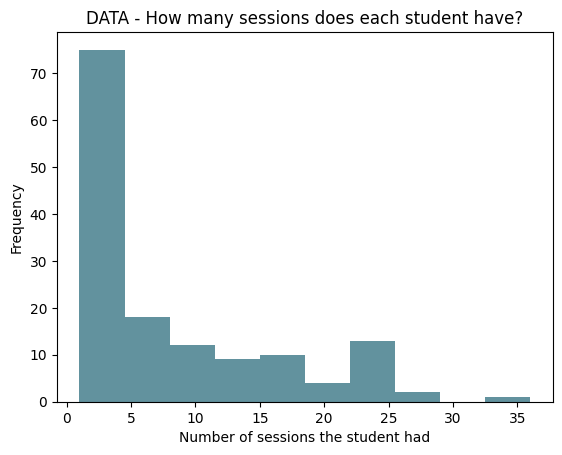

In [21]:
data_student_sessions.plot.hist(color="#62929e")
plt.title("DATA - How many sessions does each student have?")
plt.xlabel("Number of sessions the student had")
plt.show()

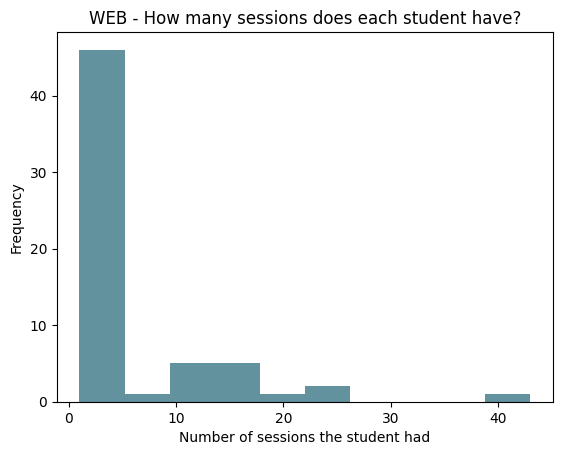

In [22]:
web_student_sessions.plot.hist(color="#62929e")
plt.title("WEB - How many sessions does each student have?")
plt.xlabel("Number of sessions the student had")
plt.show()

Since both of the above sets are right skewed, we'll use the median again for the center measurement.

In [32]:
print(
    "SESSIONS BY STUDENTS\n",
    "--------[DATA]------------\n",
    f"\tTOTAL STUDENTS: {data_student_sessions.count()}\n",
    f"\tTOTAL SESSIONS: {data_student_sessions.sum():,}\n",
    f"\tMedian number of sessions booked: {data_student_sessions.median():0.0f} sessions\n",
    f"\tMin number of sessions booked: {data_student_sessions.min()} sessions\n",
    f"\tMax number of sessions booked: {data_student_sessions.max()} sessions\n",
    "--------[WEB]------------\n",
    f"\tTOTAL STUDENTS: {web_student_sessions.count()}\n",
    f"\tTOTAL SESSIONS: {web_student_sessions.sum()}\n",
    f"\tMedian number of sessions booked: {web_student_sessions.median():0.0f} sessions\n",
    f"\tMin number of sessions booked: {web_student_sessions.min()} sessions\n",
    f"\tMax number of sessions booked: {web_student_sessions.max()} sessions\n",
)

SESSIONS BY STUDENTS
 --------[DATA]------------
 	TOTAL STUDENTS: 144
 	TOTAL SESSIONS: 1,091
 	Median number of sessions booked: 4 sessions
 	Min number of sessions booked: 1 sessions
 	Max number of sessions booked: 36 sessions
 --------[WEB]------------
 	TOTAL STUDENTS: 61
 	TOTAL SESSIONS: 320
 	Median number of sessions booked: 1 sessions
 	Min number of sessions booked: 1 sessions
 	Max number of sessions booked: 43 sessions



## How Many Sessions on Each Topic

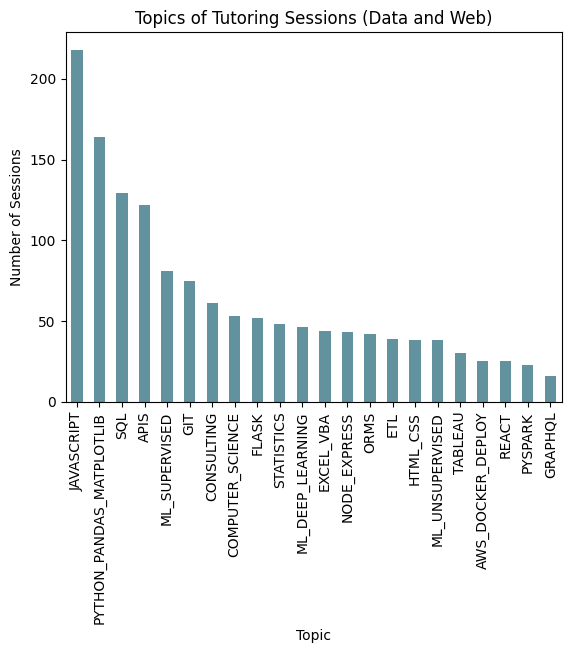

In [11]:
sessions["TOPIC"].value_counts().plot.bar(color="#62929e")
plt.title("Topics of Tutoring Sessions (Data and Web)")
plt.ylabel("Number of Sessions")
plt.xlabel("Topic")
plt.show()

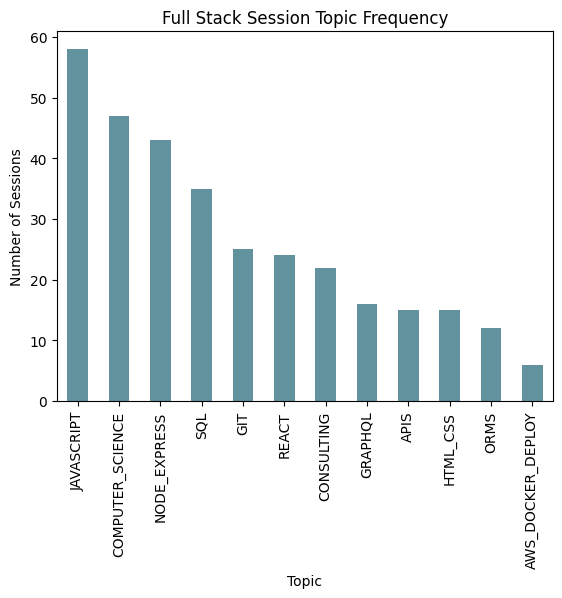

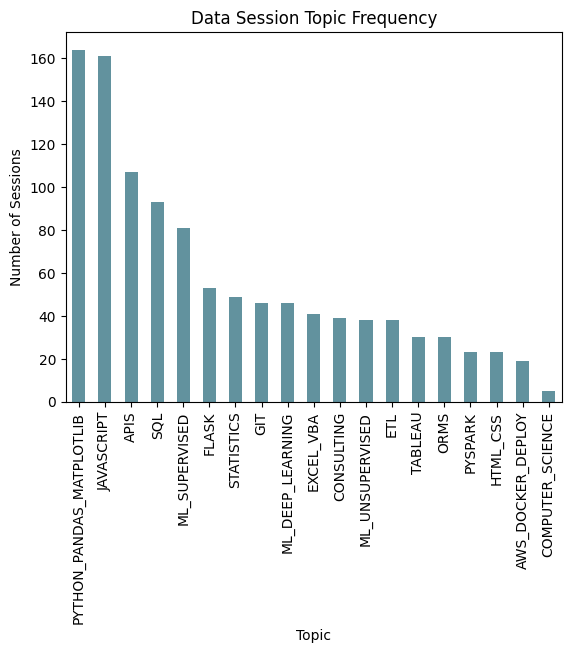

In [12]:
for bootcamp in merged_df.BOOTCAMP.unique():
  merged_df.loc[merged_df.BOOTCAMP == bootcamp]["TOPIC"].value_counts().plot.bar(color="#62929e")
  plt.title(f"{bootcamp.replace('_', ' ').title()} Session Topic Frequency")
  plt.ylabel("Number of Sessions")
  plt.xlabel("Topic")
  plt.show()

In [42]:
merged_df.START = pd.to_datetime(merged_df.START)
merged_df.END = pd.to_datetime(merged_df.END)

resampled_df = merged_df.set_index("START")
resampled_df

,DATE,END,DURATION,ID,TOPIC,BOOTCAMP,TIMEZONE
START,,,,,,,
2020-12-14 15:00:00,12/14/2020,2020-12-14 16:40:00,100.0,27,JAVASCRIPT,FULL_STACK,PACIFIC
2020-12-30 15:57:00,12/30/2020,2020-12-30 16:47:00,50.0,27,JAVASCRIPT,FULL_STACK,PACIFIC
2021-01-14 15:00:00,01/14/2021,2021-01-14 15:58:00,58.0,27,NODE_EXPRESS,FULL_STACK,PACIFIC
2021-01-18 20:00:00,01/18/2021,2021-01-18 20:50:00,50.0,27,NODE_EXPRESS,FULL_STACK,PACIFIC
2021-01-26 15:00:00,01/26/2021,2021-01-26 15:51:00,51.0,27,JAVASCRIPT,FULL_STACK,PACIFIC
...,...,...,...,...,...,...,...
2023-03-30 13:00:00,03/30/2023,2023-03-30 14:00:00,60.0,97,ML_DEEP_LEARNING,DATA,CENTRAL
2023-03-30 14:00:00,03/30/2023,2023-03-30 15:00:00,60.0,161,APIS,DATA,MOUNTAIN
2023-03-30 15:00:00,03/30/2023,2023-03-30 16:00:00,60.0,216,GIT,DATA,CENTRAL
